# 1.086 Wake modeling demo with FLORIS

This is ademonstration notebook for wake modeling in NREL's FLORIS (FLOw Redirection In Steady state) tool. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from floris.tools import FlorisInterface
import floris.tools.visualization as wakeviz
from floris.tools.visualization import visualize_cut_plane

import setup_windfarm, figuresettings

FIGPATH = Path('../figs')
FIGPATH.mkdir(parents=True, exist_ok=True)

Begin with a single wind turbine wind farm: 

In [11]:
fi = setup_windfarm.farm(rows=1, cols=1, wd_array=[270]) #[255, 270, 285])
fi_jensen = setup_windfarm.farm(rows=1, cols=1, wd_array=[270], velocity_model='Jensen') 

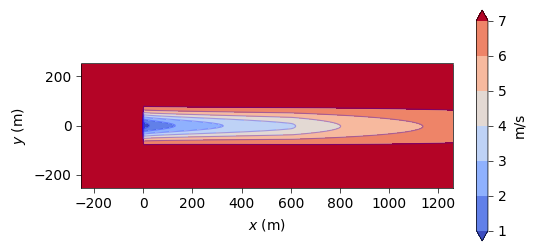

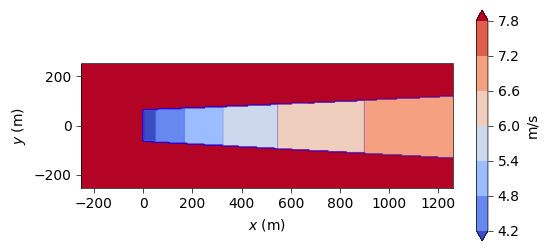

In [13]:
for _fi, name in zip([fi, fi_jensen], ['Gauss', 'Jensen']): 
    horizontal_plane = _fi.calculate_horizontal_plane(
        x_resolution=256,
        y_resolution=128,
        height=90.0,
    )

    fig, ax = plt.subplots(figsize=(6, 3))
    wakeviz.visualize_cut_plane(horizontal_plane, ax=ax, color_bar=True)
    ax.set_xlabel('$x$ (m)')
    ax.set_ylabel('$y$ (m)')
    plt.savefig(FIGPATH / f'single_turbine_270_{name:s}.png')
    plt.show()

Let's stick with the Gaussian wake model and run a larger wind farm. 

We will consider multiple wind directions for a couple different wind farm layouts. 

In [19]:
fi = setup_windfarm.farm(Sx=6, Sy=6, rows=6, cols=6, wd_array=[270], ws_array=[12])

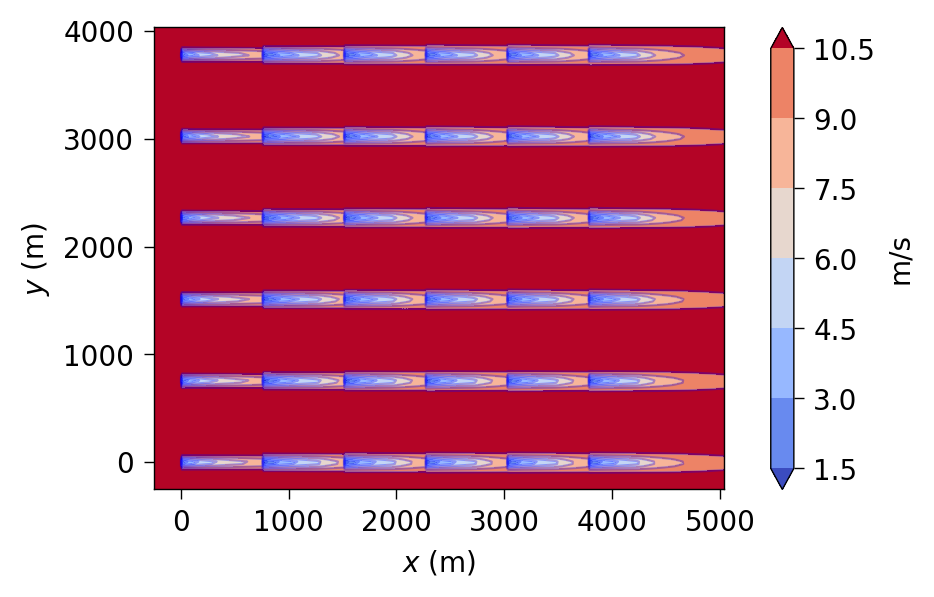

In [36]:
# plot just one wind direction initially
horizontal_plane = fi.calculate_horizontal_plane(
    x_resolution=400,
    y_resolution=200,
    height=90.0,
    # yaw_angles=,
)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
wakeviz.visualize_cut_plane(horizontal_plane, ax=ax, color_bar=True)
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$y$ (m)')

plt.show()

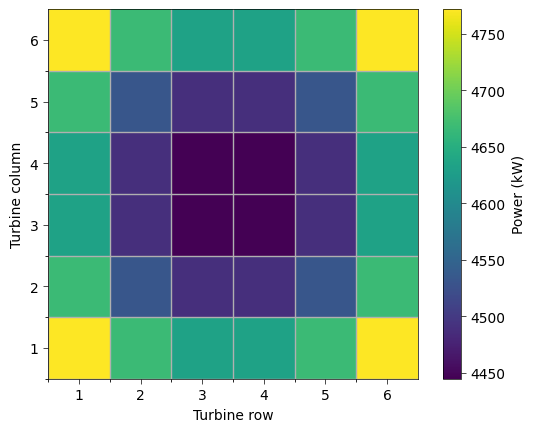

In [74]:
# Visualize turbine power production
def contour_power(turbine_powers, ax=None, rows=6, cols=6, cmap='viridis'):
    if ax is None: 
        _, ax = plt.subplots()

    power_avg = np.mean(turbine_powers, axis=(0, 1)).reshape(rows, cols)
    extent = [0.5, rows+0.5, 0.5, cols+0.5]
    im = ax.imshow(power_avg.T, origin='lower', extent=extent, cmap=cmap)

    # Custom grid
    ax.set_xticks([x+0.5 for x in range(0,cols)],minor=True )
    ax.set_yticks([y+0.5 for y in range(0,rows)],minor=True)
    #plot grid on minor axes
    plt.grid(which="minor",ls="-",lw=1)
    ax.set_xlabel('Turbine row')
    ax.set_ylabel('Turbine column')

    return im, ax

im, ax = contour_power(turbine_powers)
plt.colorbar(im, label='Average power (kW)')
plt.show()

In [70]:
fi.reinitialize(wind_directions=np.arange(0, 360, 2))

In [71]:
fi.calculate_wake()
turbine_powers = fi.get_turbine_powers() / 1E3 # In kW


TypeError: 'norm' must be an instance of matplotlib.colors.Normalize, str or None, not a numpy.ndarray

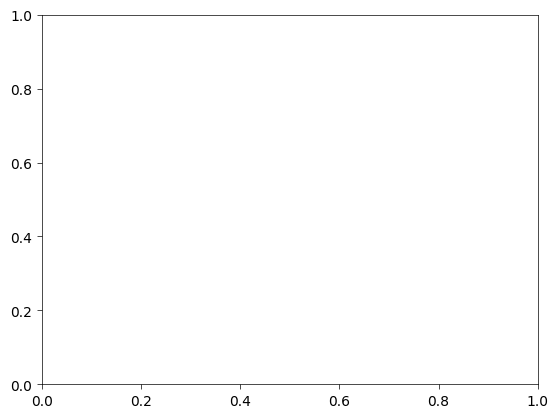

In [33]:
fig, ax = plt.subplots()

ax.imshow(fi.layout_x.reshape(6,6), fi.layout_y.reshape(6,6), turbine_powers.squeeze().reshape(6,6))
ax.grid('on')

In [10]:
fi.reinitialize(turbulence_intensity=0.15)

In [11]:
horizontal_plane = fi.calculate_horizontal_plane(
    x_resolution=200,
    y_resolution=100,
    height=90.0,
    # yaw_angles=,
)

In [12]:
fi.calculate_wake()
turbine_powers = fi.get_turbine_powers() / 1E3 # In kW


<Axes: >

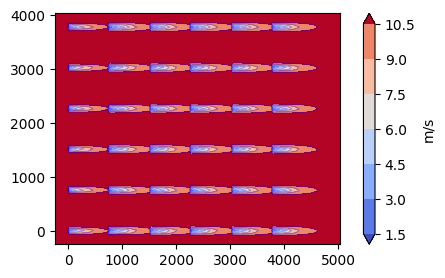

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
wakeviz.visualize_cut_plane(horizontal_plane, ax=ax, color_bar=True)
